In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [36]:
# 시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

# 데이터 프레임워크 생성
data =pd.DataFrame({'Date': dates, 'Value' : values})


#결측치 생성
data.loc[50:150, 'Value'] = np.nan
print(data.loc[50:150])

          Date  Value
50  2023-02-20    NaN
51  2023-02-21    NaN
52  2023-02-22    NaN
53  2023-02-23    NaN
54  2023-02-24    NaN
..         ...    ...
146 2023-05-27    NaN
147 2023-05-28    NaN
148 2023-05-29    NaN
149 2023-05-30    NaN
150 2023-05-31    NaN

[101 rows x 2 columns]


### ARIMA 모델 활용하여 결측치 예측과 대처 실습

In [37]:
model = ARIMA(data['Value'].dropna(), order=(1,1,1))
model_fit = model.fit()

#결측치 예측
predicted_values = model_fit.predict(start=50, end=2000)
print(predicted_values)

#결측치 대처
data.loc[50:150, 'Value temp']= predicted_values
print(data[50:150])


c:\Users\besth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\besth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\besth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


50     -0.202892
51     -0.179717
52     -0.096936
53     -0.153211
54     -0.146990
          ...   
1996   -0.005793
1997   -0.005793
1998   -0.005793
1999   -0.005793
2000   -0.005793
Name: predicted_mean, Length: 1951, dtype: float64
          Date  Value  Value temp
50  2023-02-20    NaN   -0.202892
51  2023-02-21    NaN   -0.179717
52  2023-02-22    NaN   -0.096936
53  2023-02-23    NaN   -0.153211
54  2023-02-24    NaN   -0.146990
..         ...    ...         ...
145 2023-05-26    NaN   -0.003028
146 2023-05-27    NaN   -0.024160
147 2023-05-28    NaN    0.007965
148 2023-05-29    NaN   -0.010836
149 2023-05-30    NaN    0.006379

[100 rows x 3 columns]


c:\Users\besth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


order=(1,1,1) 매개변수를 사용하여 ARIMA 모델을 설정합니다. order 매개변수는 AR, 차분(Differencing), MA 성분을 지정합니다. 여기서 (1,1,1)은 AR(1) 모델, 차분(degree of differencing)이 1, 그리고 MA(1) 모델을 의미합니다.

ARIMA 모델은 시계열 데이터의 자동회귀(AR) 성분, 차분(Differencing) 성분, 이동평균(MA) 성분을 모두 고려하여 시계열 패턴을 모델링합니다.

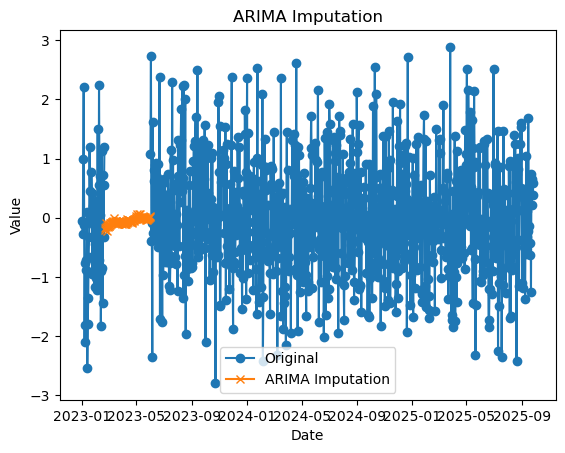

In [38]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value temp'], 'x-', label='ARIMA Imputation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Imputation')
plt.legend()
plt.show()